In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

tracks_df = pd.read_json("./../data/raw/05_02_v2/tracks.jsonl", lines=True)
users_df = pd.read_json("./../data/raw/05_02_v2/users.jsonl", lines=True)
session_df = pd.read_json("./../data/raw/05_02_v2/sessions.jsonl", lines=True)
artists = pd.read_json("./../data/raw/05_02_v2/artists.jsonl", lines=True)
tracks_storage_df = pd.read_json(
    "./../data/raw/05_02_v1/track_storage.jsonl", lines=True
)

In [2]:
for x in [tracks_df, users_df, session_df, artists]:
    print(x.isnull().sum(), x.shape, "\n")

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
id_artist           0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
dtype: int64 (22412, 17) 

user_id             0
name                0
city                0
street              0
favourite_genres    0
premium_user        0
dtype: int64 (500, 6) 

session_id         0
timestamp          0
user_id            0
track_id      102466
event_type         0
dtype: int64 (759425, 5) 

id        0
name      0
genres    0
dtype: int64 (1667, 3) 


In [3]:
session_df[
    session_df["track_id"].isna() & (session_df["event_type"] != "advertisment")
].shape

(0, 5)

## Combine artist with tracks to get track genre

In [4]:
tracks_df.columns, artists.columns
tracks_genre_df = tracks_df.merge(
    artists[["id", "genres"]], left_on="id_artist", right_on="id", how="inner"
)
tracks_genre_df

,id_x,name,popularity,duration_ms,explicit,id_artist,release_date,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id_y,genres
0,0RNxWy0PC3AyH4ThH3aGK6,Mack the Knife,55,201467,0,19eLuQmk9aCobbVDHc6eek,1929,0.673,0.3770,0,-14.141,0.0697,0.586000,0.000000,0.332,0.713,88.973,19eLuQmk9aCobbVDHc6eek,"[adult standards, dixieland, harlem renaissanc..."
1,17gxfuiFUrLhbUKdunxUPJ,Moon River,58,179867,0,19eLuQmk9aCobbVDHc6eek,1964-10-25,0.448,0.1200,0,-14.089,0.0355,0.877000,0.013500,0.100,0.261,86.407,19eLuQmk9aCobbVDHc6eek,"[adult standards, dixieland, harlem renaissanc..."
2,63kd4m3VFxcJjPVVtbVNAu,"Hello, Dolly!",53,147000,0,19eLuQmk9aCobbVDHc6eek,1964-10-25,0.000,0.4050,0,-9.935,0.0000,0.842000,0.001140,0.198,0.000,0.000,19eLuQmk9aCobbVDHc6eek,"[adult standards, dixieland, harlem renaissanc..."
3,1qCQTy0fTXerET4x8VHyr9,What A Wonderful World,74,137520,0,19eLuQmk9aCobbVDHc6eek,1968,0.399,0.2580,5,-16.028,0.0330,0.792000,0.000002,0.128,0.192,108.174,19eLuQmk9aCobbVDHc6eek,"[adult standards, dixieland, harlem renaissanc..."
4,1UH4viviUjZnS9aWgPGrk0,La vie en rose - Single Version,66,204400,0,19eLuQmk9aCobbVDHc6eek,1989-01-01,0.507,0.0779,0,-12.099,0.0544,0.866000,0.002750,0.108,0.326,70.808,19eLuQmk9aCobbVDHc6eek,"[adult standards, dixieland, harlem renaissanc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22407,7yvgurK6MRYwTbZ2UOgkgj,Jesteśmy tu,56,187200,1,4nPxrGG7k7aEKmNLsfX4cd,2020-08-28,0.779,0.6140,11,-6.631,0.1090,0.496000,0.000000,0.131,0.554,99.919,4nPxrGG7k7aEKmNLsfX4cd,"[polish hip hop, polish trap]"
22408,62Qu77wJcmICTHse0f9qsQ,Wschód (Intro),53,145213,1,4nPxrGG7k7aEKmNLsfX4cd,2020-08-28,0.741,0.5880,2,-7.531,0.1300,0.474000,0.000004,0.149,0.798,96.012,4nPxrGG7k7aEKmNLsfX4cd,"[polish hip hop, polish trap]"
22409,1Ddj6nkhUP3lHpLvDqPsvC,Strip That Down - Acoustic,57,184476,0,5pUo3fmmHT8bhCyHE52hA6,2017-06-16,0.880,0.3800,6,-7.811,0.0605,0.639000,0.000000,0.124,0.912,105.982,5pUo3fmmHT8bhCyHE52hA6,"[dance pop, pop, post-teen pop]"
22410,1Ca2ELRlvACAeI7xz9c9jR,Spaceman,54,379261,0,6BrvowZBreEkXzJQMpL174,2012-02-06,0.599,0.7630,3,-3.727,0.0553,0.000262,0.794000,0.241,0.118,127.997,6BrvowZBreEkXzJQMpL174,"[big room, dance pop, dutch house, edm, electr..."


In [5]:
exploded_genres = tracks_genre_df[["id_x", "genres"]].explode("genres").reset_index()
exploded_genres = exploded_genres.rename(
    columns={"id_x": "track_id", "genres": "genre"}
)
# exploded_genres.to_json('../data/processed/track_exploded_genres.json')

In [6]:
exploded_genres["genre"].value_counts().describe()

count     779.000000
mean      116.417202
std       329.489929
min         1.000000
25%        12.000000
50%        26.000000
75%        77.500000
max      4694.000000
Name: count, dtype: float64

Oznacza to, że 75% gatunków posiada średnio 77,5 piosenki. Zatem skupimy się tylko na gatunkach, które posiadają co najmniej 500 piosenek. Takich gatunków jest 37

<Axes: >

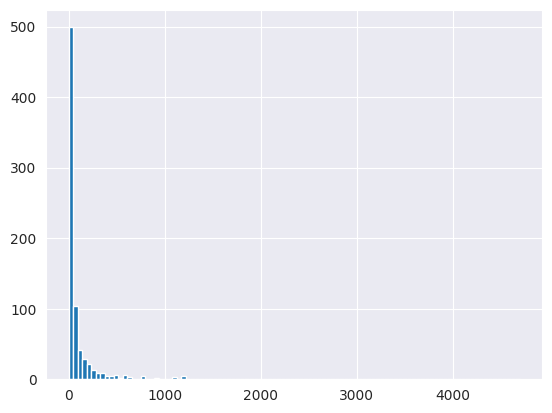

In [7]:
total_genre_counts = exploded_genres["genre"].value_counts().reset_index(name="count")
total_genre_counts.columns = ["genre", "track count"]
total_genre_counts["track count"].hist(bins=100)

In [8]:
total_genre_counts[total_genre_counts["track count"] >= 500].shape

(37, 2)

In [9]:
exploded_genres
session_df_with_genres = session_df.merge(
    exploded_genres, left_on="track_id", right_on="track_id", how="inner"
)
session_df_with_genres.to_json("../data/processed/sessions_with_tracks_genres.jsonl")

In [10]:
for genre, group in exploded_genres.groupby("genre"):
    print(f"Genre: {genre}")
    print(group.head())

Genre: a cappella
       index                track_id       genre
77431  17960  550rQQCGkrTzvp4SfpOPzx  a cappella
77432  17961  6ukvsBzq4d1vBsAUmz7ZVt  a cappella
77433  17962  1klGbW5a9qTBFUjFfddbmU  a cappella
Genre: acid rock
      index                track_id      genre
3938    732  5uvosCdMlFdTXhoazkTI5R  acid rock
3943    733  6ToM0uwxtPKo9CMpbPGYvM  acid rock
3948    734  1Jmqubf9kGkWeYQXQKImL5  acid rock
3953    735  67HxeUADW4H3ERfaPW59ma  acid rock
3958    736  2Xdc6qyaFBJZ8QW1KhpVci  acid rock
Genre: acoustic pop
       index                track_id         genre
46136   9656  4tK4ARuilOrBzwVQK73E0Y  acoustic pop
46141   9657  2mKjs6s0Z1imKKb6gOk628  acoustic pop
46146   9658  1EzrEOXmMH3G43AXT1y7pA  acoustic pop
46151   9659  3S0OXQeoh0w6AY8WQVckRW  acoustic pop
46156   9660  5ivF4eQBqJiVL5IAE9jRyl  acoustic pop
Genre: adult standards
    index                track_id            genre
0       0  0RNxWy0PC3AyH4ThH3aGK6  adult standards
8       1  17gxfuiFUrLhbUKdunxUPJ  a

## Sessions analisys

In [11]:
session_df.columns, session_df["event_type"].unique()

(Index(['session_id', 'timestamp', 'user_id', 'track_id', 'event_type'], dtype='object'),
 array(['play', 'skip', 'like', 'advertisment'], dtype=object))

In [12]:
session_df.isnull().sum()

session_id         0
timestamp          0
user_id            0
track_id      102466
event_type         0
dtype: int64

In [13]:
session_df[session_df["track_id"].isna()]["event_type"].unique()

array(['advertisment'], dtype=object)

Widać, że brak `track_id` jest wyłącznie podczas reklam co nie wpływa na nasz problem

Time range of the dataset: 2022-11-30 08:59:45 to 2023-11-30 09:06:15.969000


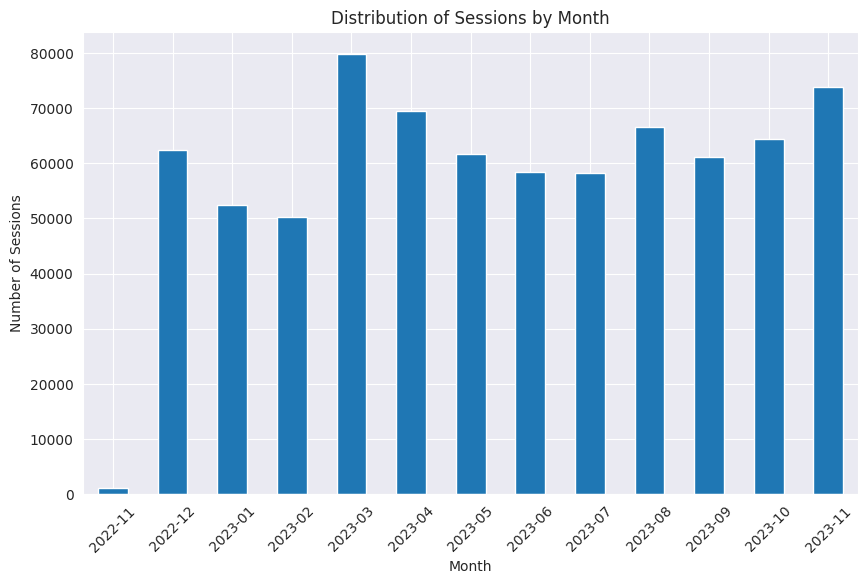

In [14]:
session_df["timestamp"] = pd.to_datetime(session_df["timestamp"])

start_date = session_df["timestamp"].min()
end_date = session_df["timestamp"].max()
print(f"Time range of the dataset: {start_date} to {end_date}")

session_df["year-month"] = session_df["timestamp"].dt.strftime("%Y-%m")
session_df["year-month"].value_counts().sort_index().plot(kind="bar", figsize=(10, 6))

plt.title("Distribution of Sessions by Month")
plt.xlabel("Month")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.show()

user_id
101    234
102    296
103    234
104    298
105    261
      ... 
596    262
597    268
598    225
599    260
600    268
Name: session_id, Length: 500, dtype: int64
333 204


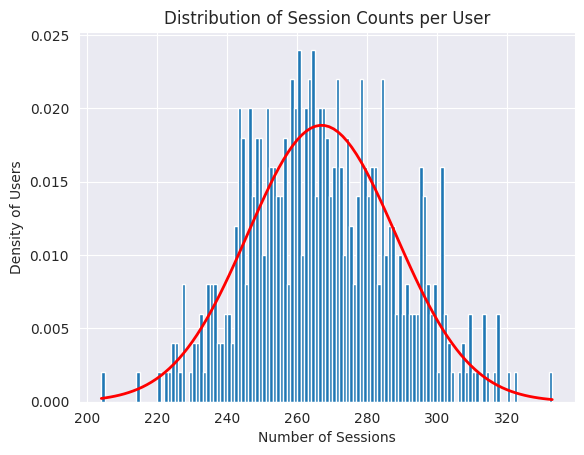

In [15]:
# Count sessions per user
session_counts = session_df.groupby("user_id").session_id.nunique()
print(session_counts)

# Plot the distribution of session counts
print(session_counts.max(), session_counts.min())

# Calculate mean and standard deviation
mean = session_counts.mean()
std = session_counts.std()

# Plot the histogram
plt.hist(
    session_counts,
    bins=range(session_counts.min(), session_counts.max() + 1),
    edgecolor="white",
    density=True,
)
plt.title("Distribution of Session Counts per User")
plt.xlabel("Number of Sessions")
plt.ylabel("Density of Users")

# Generate x values from min to max session count
x = np.linspace(session_counts.min(), session_counts.max(), 100)

# Generate the normal distribution curve
y = stats.norm.pdf(x, mean, std)

# Plot the normal distribution curve
plt.plot(x, y, "r-", lw=2)
plt.show()

Histogram przedstawia znormalizowaną liczbę różnych sesji per użytkownik. Widać mało wartości odstających i rozstrzał między maksymalną liczbą sesji i minimalną jest niska, więc są to dane zbalansowane.

user_id
101    1319
102    1713
103    1311
104    1901
105    1580
       ... 
596    1568
597    1731
598    1106
599    1484
600    1330
Length: 500, dtype: int64


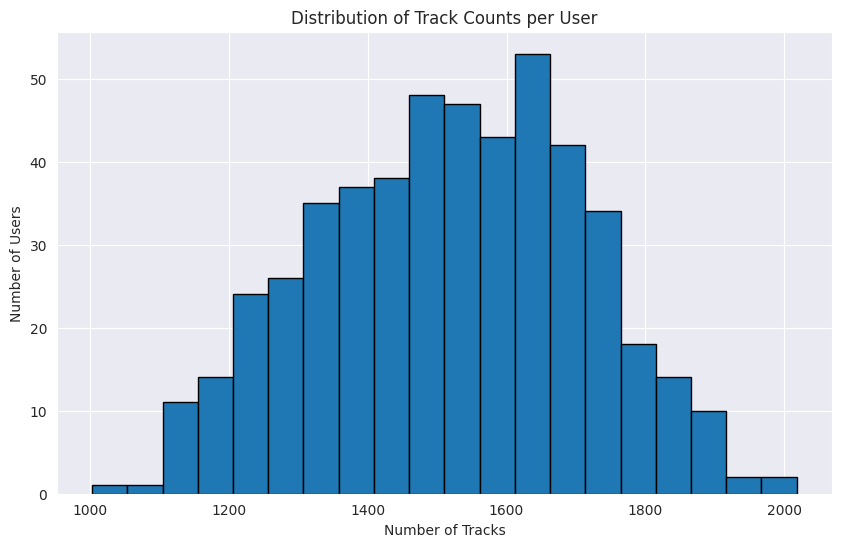

In [16]:
track_counts = session_df.groupby("user_id").size()
print(track_counts)

# Plot the distribution of track counts
plt.figure(figsize=(10, 6))
plt.hist(track_counts, bins=20, edgecolor="black")
plt.title("Distribution of Track Counts per User")
plt.xlabel("Number of Tracks")
plt.ylabel("Number of Users")
plt.show()

In [17]:
events_per_session = session_df.groupby("session_id").size().mean()
print(f"Average number of events per session: {events_per_session:.2f}")

Average number of events per session: 5.69


## track_storage.jsonl

In [18]:
# tracks_storage_df.shape
for col_name in tracks_storage_df.columns:
    print(col_name)

tracks_storage_df["storage_class"].unique()

track_id
storage_class
daily_cost


array(['slow', 'medium', 'fast'], dtype=object)

In [19]:
tracks_storage_df.isnull().sum()

track_id         0
storage_class    0
daily_cost       0
dtype: int64

Nie ma tutaj, żadnych nulli. Na podstawy naszego zadania te dane nie będą nam przydatne.

## Users

In [20]:
users_df.columns, users_df.isnull().sum()

(Index(['user_id', 'name', 'city', 'street', 'favourite_genres',
        'premium_user'],
       dtype='object'),
 user_id             0
 name                0
 city                0
 street              0
 favourite_genres    0
 premium_user        0
 dtype: int64)

        favourite_genres  count
0                country     43
1           canadian pop     40
2               ranchera     39
3        latin arena pop     39
4                    rap     38
5                hip hop     37
6                corrido     37
7                    pop     37
8              reggaeton     36
9       alternative rock     35
10         post-teen pop     35
11      psychedelic rock     34
12       adult standards     33
13          country road     33
14           modern rock     32
15        french hip hop     31
16       k-pop boy group     31
17             soft rock     31
18       rock en espanol     31
19             latin pop     31
20      regional mexican     31
21           mexican pop     31
22              pop rock     31
23            neo mellow     31
24             hard rock     30
25           trap latino     30
26                  rock     30
27               pop rap     30
28             folk rock     30
29              tropical     29
30      

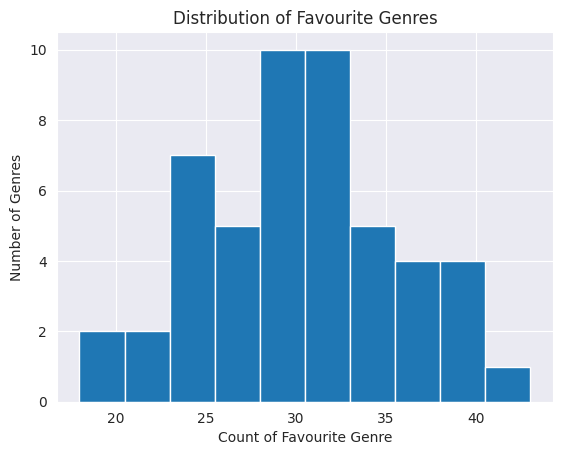

In [21]:
favourite_genres_series = (
    users_df.explode("favourite_genres")
    .groupby("favourite_genres")
    .size()
    .sort_values(ascending=False)
)
favourite_genres_df = favourite_genres_series.reset_index(name="count")
favourite_genres_df.columns = ["favourite_genres", "count"]

print(favourite_genres_df)

favourite_genres_df["count"].hist(bins=10)
plt.title("Distribution of Favourite Genres")
plt.xlabel("Count of Favourite Genre")
plt.ylabel("Number of Genres")
plt.show()

In [22]:
print(users_df.groupby("premium_user").size())

(
    users_df.groupby("premium_user")
    .size()
    .value_counts(normalize=True, dropna=False)
    .mul(100)
    .round(2)
    .astype(str)
    + "%"
)

premium_user
False    388
True     112
dtype: int64


388    50.0%
112    50.0%
Name: proportion, dtype: object

Większość użytkowników nie posiada konta premium, co sprawia, że może mieć to wpływ na pomijanie piosenek i irytacji

## Tracks.jsonl

<Axes: >

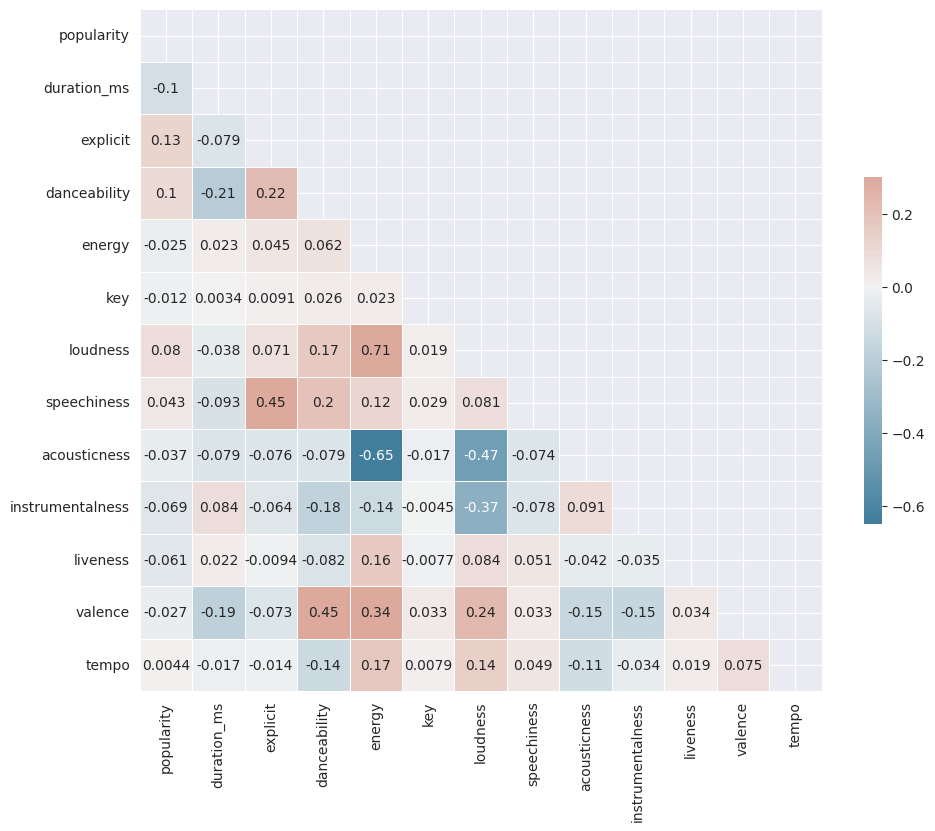

In [23]:
tracks_values = tracks_df.drop(columns=["id", "name", "id_artist", "release_date"])
tracks_values.columns
corr = tracks_values.corr()

f, ax = plt.subplots(figsize=(11, 9))


mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    cmap=cmap,
    vmax=0.3,
    center=0,
    annot=True,
    mask=mask,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)